# **The Boston Housing Dataset**

#### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv',header = None, delimiter = r"\s+", names = columns)

# Analysis of data set

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# insure that we have numeric data
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
# dimensionality of the dataset
print(df.shape)

(506, 14)


In [6]:
# statistical details of the data set
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Check missing data
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(df)


,Total,Percent
MEDV,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


In [8]:
df = round(df,4)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### The following describes the dataset columns:

CRIM - per capita crime rate by town
<br>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
<br>INDUS - proportion of non-retail business acres per town.
<br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br>NOX - nitric oxides concentration (parts per 10 million)
<br>RM - average number of rooms per dwelling
<br>AGE - proportion of owner-occupied units built prior to 1940
<br>DIS - weighted distances to five Boston employment centres
<br>RAD - index of accessibility to radial highways
<br>TAX - full-value property-tax rate per 10,000 USD
<br>PTRATIO - pupil-teacher ratio by town
<br>B - 1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in thousdands


### Data Visualization

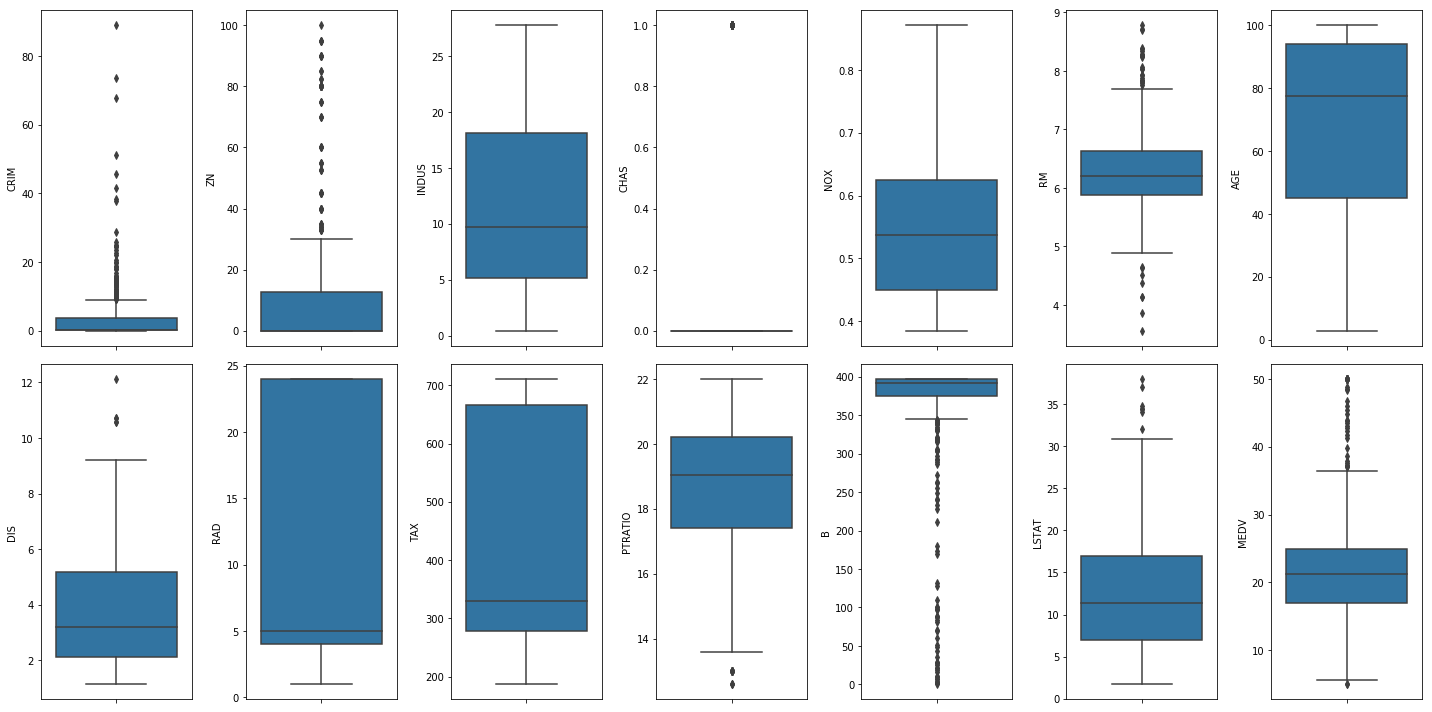

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in df.items():
    sns.boxplot(y=i, data=df, ax=axs[index])
    index += 1
plt.tight_layout()


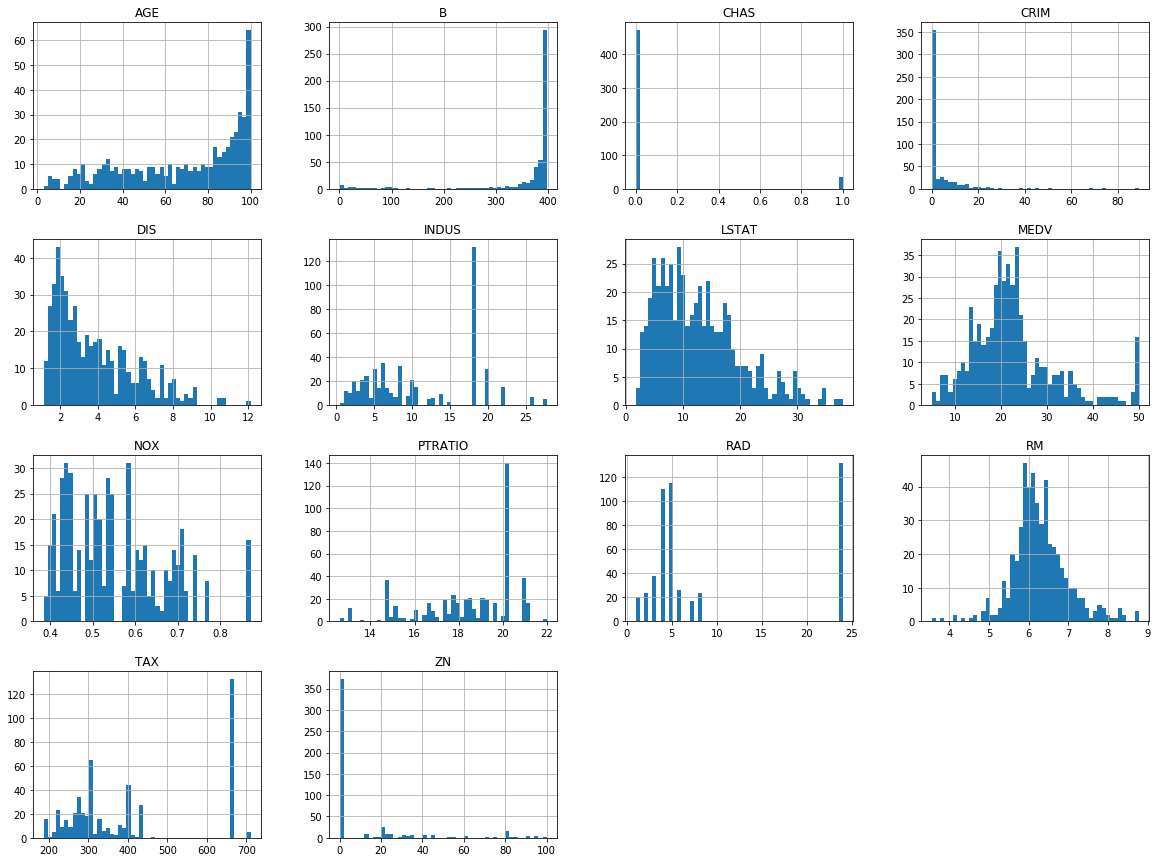

In [10]:
df.hist(bins = 50, figsize = (20,15))
# plt.savefig("Images/boxplot_variables.png")
plt.show()

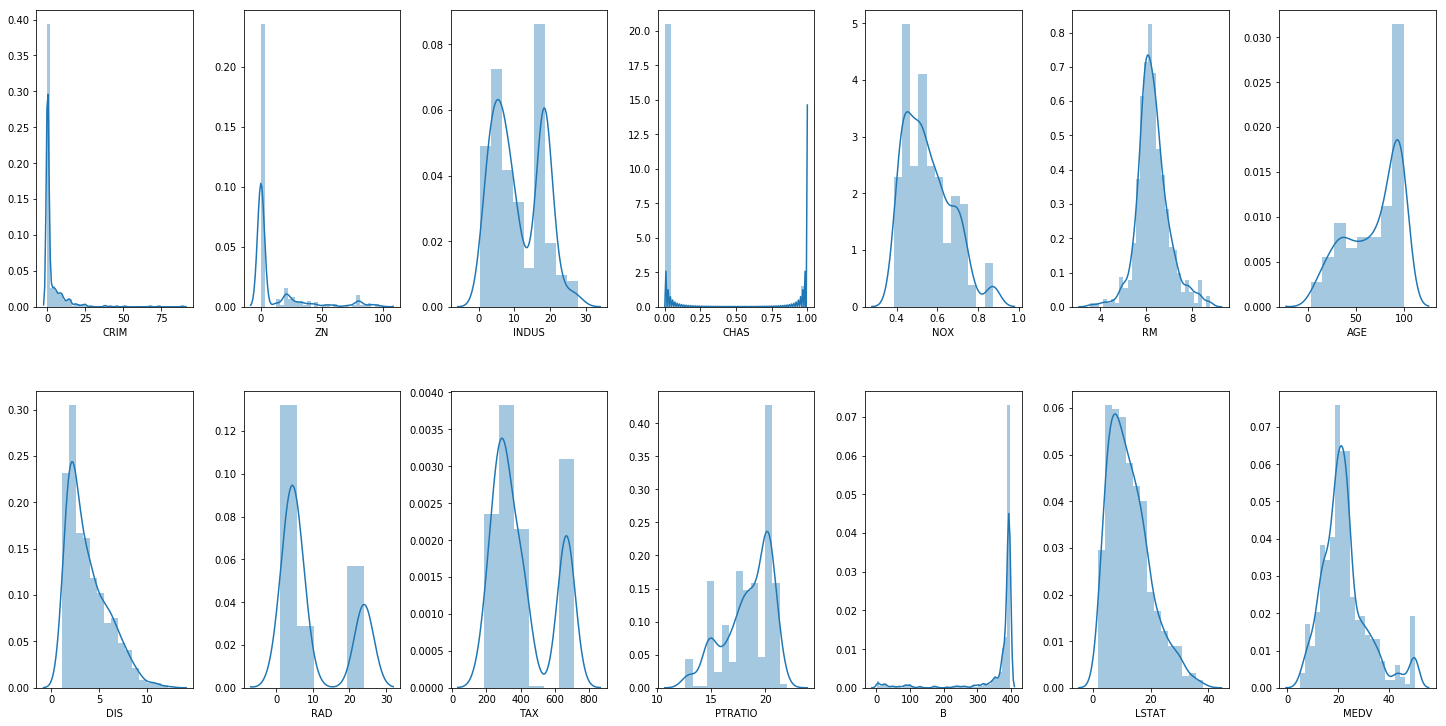

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

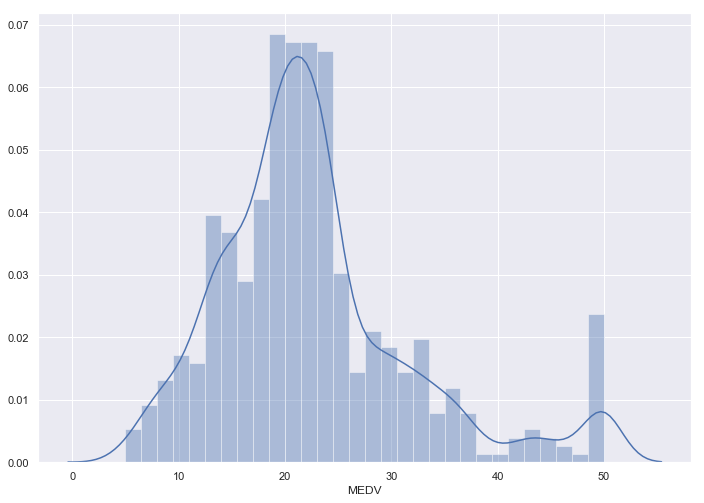

In [12]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(df['MEDV'], bins=30)
plt.show()


#### MEDV stops at 50, take out outliers

In [13]:
df = df[~(df['MEDV'] >= 50.0)]

In [14]:
# dimensionality of the preprocessed dataset
df.shape

(490, 14)

### Correlation Heat Map

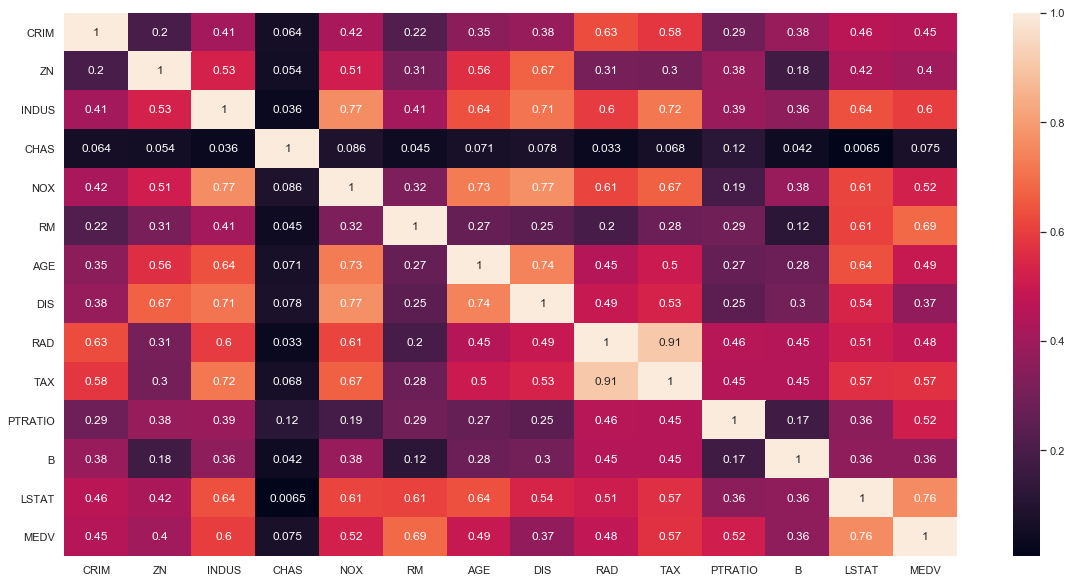

In [15]:
plt.figure(figsize = (20,10))
# plt.tight_layout()

sns.heatmap(df.corr().abs(), annot = True);

### RM & LSTAT most highly correlated with the target, MEDEV

Recall:
<br>RM - average number of rooms per dwelling
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in thousdands


In [16]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.686634
ZN         0.404608
DIS        0.368813
B          0.364928
CHAS       0.074803
CRIM      -0.450115
RAD       -0.476296
AGE       -0.492915
PTRATIO   -0.518641
NOX       -0.524451
TAX       -0.572442
INDUS     -0.600005
LSTAT     -0.759837
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV','RM','ZN','LSTAT','INDUS']

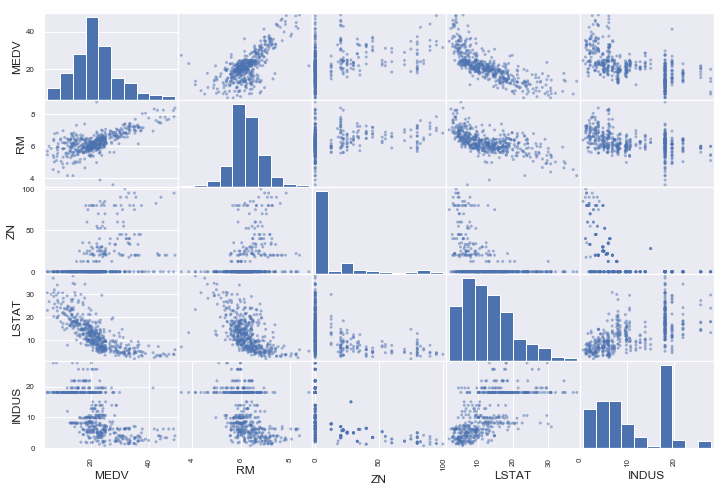

In [18]:
scatter_matrix(df[attributes], figsize = (12,8));


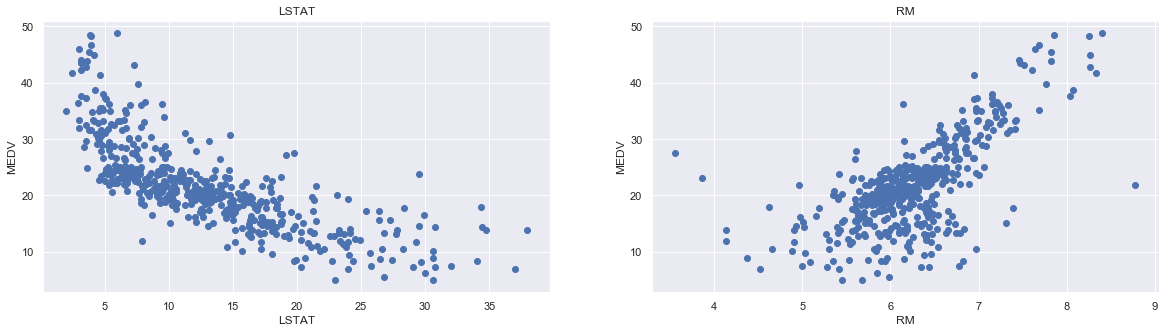

In [19]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
    

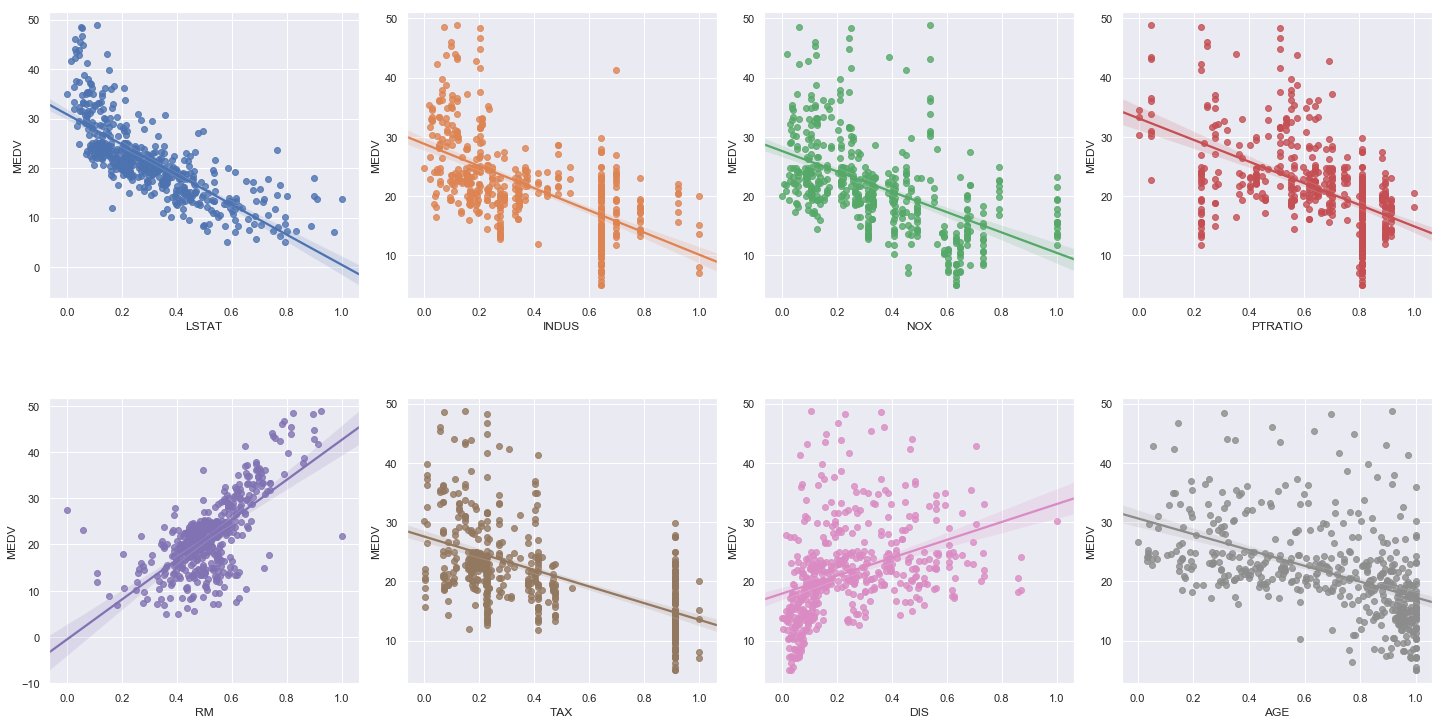

In [20]:
# Let's scale the columns before plotting them against MEDV
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Preparation of the data for training

In [21]:
# Prepare the data for training
column_sels = ['LSTAT','RM']
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = column_sels)
Y = df['MEDV']


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(328, 2)
(162, 2)
(328,)
(162,)


In [23]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

In [24]:
train_scores = []
test_scores = []
scores_map = {}
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

# **Linear Regression**


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# model evaluation for training set

y_train_predict_lin = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict_lin)))
r2 = r2_score(Y_train, y_train_predict_lin)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict_lin = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict_lin)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict_lin)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 4.852325210639438
R2 score is 0.6160360392101499


The model performance for testing set
--------------------------------------
RMSE is 4.117517347911147
R2 score is 0.7275835855770998


In [27]:
scores = cross_val_score(lin_model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['LinearRegression'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -26.60 (+/- 18.45)


In [28]:
# create a data frame for comparing test and predicted data
df2 = pd.DataFrame({"Prediction Linear Regr": np.round(y_test_predict_lin,4), "Actual": Y_test}).reset_index(drop=True)
df2.head(10)

,Prediction Linear Regr,Actual
0,16.0767,18.5
1,17.1114,12.7
2,24.5079,21.4
3,26.8316,23.7
4,20.3056,20.8
5,25.6367,25.0
6,9.4875,9.7
7,20.0865,14.9
8,31.5625,34.9
9,29.3610,31.6


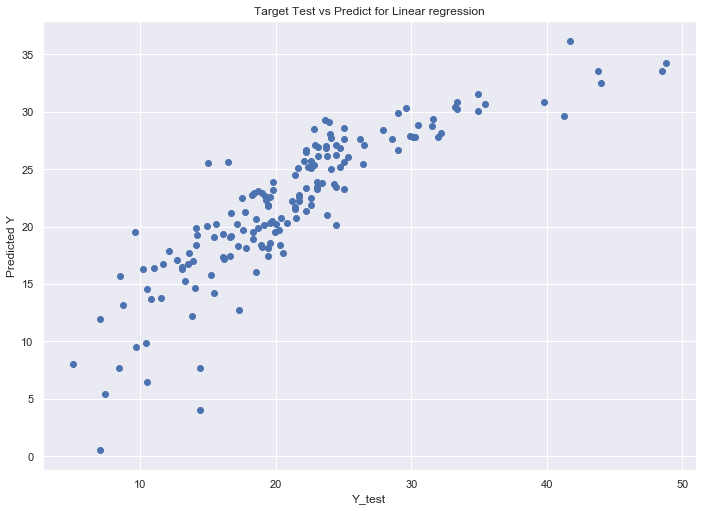

In [29]:
# plotting the y_test vs y_test_predict_lin for Linear regression
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_lin)
plt.title("Target Test vs Predict for Linear regression")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()


In [30]:
# Define trianing and testing score accuracy
train_score = lin_model.score(X_train, Y_train)
test_score = lin_model.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.62
Test Accuracy: 0.73


# **Polynomial Regression**

We can see that **LSTAT** doesn't vary too well in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use Polyniomial Features class from sklearn library. 


In [31]:
from sklearn.preprocessing import PolynomialFeatures
 
degree = 3  

# Creates a polynomial regression model for the given degree
poly_features = PolynomialFeatures(degree=degree)
  
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train) 
X_test_poly = poly_features.fit_transform(X_test)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  
# predicting on training data-set
y_train_predicted_poly = poly_model.predict(X_train_poly)
  
# predicting on test data-set
y_test_predict_poly = poly_model.predict(X_test_poly)
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted_poly))
r2_train = r2_score(Y_train, y_train_predicted_poly)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict_poly))
r2_test = r2_score(Y_test, y_test_predict_poly)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))
    

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.6372468819857993
R2 score of training set is 0.7842572436902788


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.390840571873793
R2 score of test set is 0.8152531088487804


In [32]:
scores = cross_val_score(poly_model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolynomialRegression'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -26.60 (+/- 18.45)


In [33]:
# create a data frame for comparing test and predicted data
df3 = pd.DataFrame({"Prediction Polyniomial Regr": np.round(y_test_predict_poly,4), "Actual": Y_test}).reset_index(drop=True)
df3.head(10)

,Prediction Polyniomial Regr,Actual
0,16.1444,18.5
1,16.1863,12.7
2,23.6450,21.4
3,26.4020,23.7
4,17.2571,20.8
5,25.0703,25.0
6,13.1047,9.7
7,15.2180,14.9
8,35.2352,34.9
9,32.9492,31.6


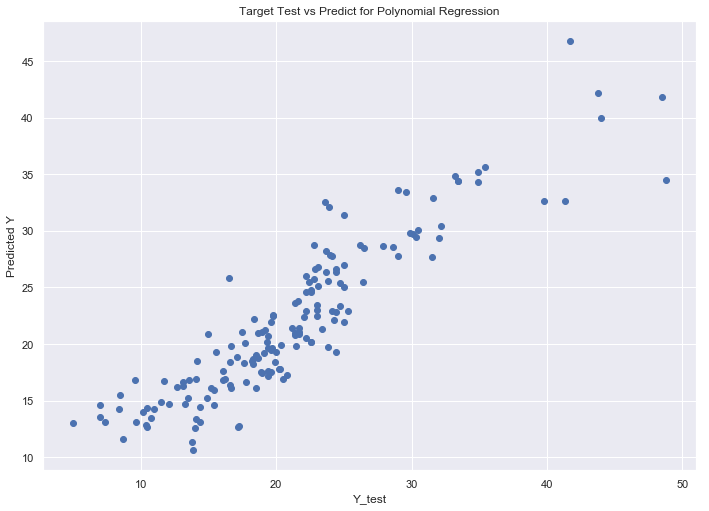

In [34]:
# plotting the y_test vs y_test_predict for Polynomial Regression
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_poly)
plt.title("Target Test vs Predict for Polynomial Regression")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()


In [35]:
# Define trianing and testing score accuracy
train_score = poly_model.score(X_train_poly, Y_train)
test_score = poly_model.score(X_test_poly, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.78
Test Accuracy: 0.82


# **Polynomial Regression with L2**

In [36]:
# Polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -18.06 (+/- 11.51)


In [37]:
model.fit(X_train,Y_train)
y_test_predict_L2 = model.predict(X_test)

In [38]:
# create a data frame for comparing test and predicted data
df5 = pd.DataFrame({"Prediction Polynomial Regr with L2": np.round(y_test_predict_L2,4), "Actual": Y_test}).reset_index(drop=True)
df5.head(10)

,Prediction Polynomial Regr with L2,Actual
0,16.4241,18.5
1,15.8027,12.7
2,23.6589,21.4
3,26.7003,23.7
4,19.8360,20.8
5,25.0782,25.0
6,14.2148,9.7
7,15.6548,14.9
8,35.2581,34.9
9,31.0885,31.6


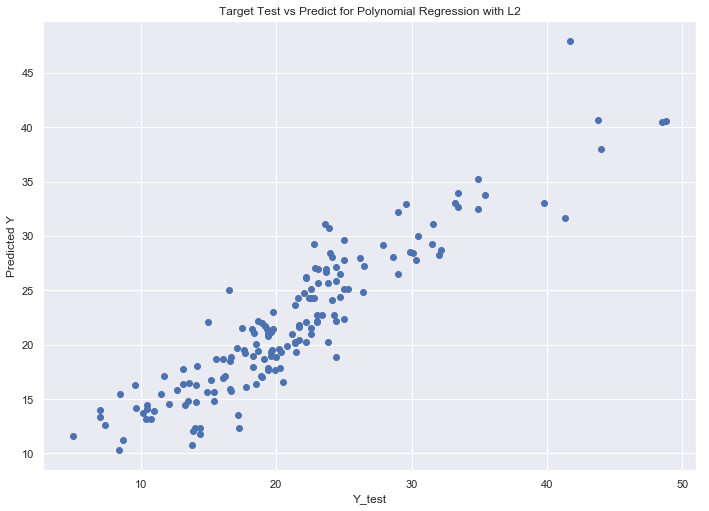

In [39]:
# plotting the y_test vs y_test_predict_lin for Polynomial Regression with L2
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_L2)
plt.title("Target Test vs Predict for Polynomial Regression with L2")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [40]:
# Define trianing and testing score accuracy
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.75
Test Accuracy: 0.83


# **Linear Ridge Regression**

In [41]:
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -25.79 (+/- 16.57)


In [42]:
l_ridge.fit(X_train,Y_train)
y_test_predict_ridge = l_ridge.predict(X_test)

In [43]:
# create a data frame for comparing test and predicted data
df6 = pd.DataFrame({"Prediction Linear Ridge Regr": np.round(y_test_predict_ridge,4), "Actual": Y_test}).reset_index(drop=True)
df6.head(10)

,Prediction Linear Ridge Regr,Actual
0,16.0892,18.5
1,17.1085,12.7
2,24.5146,21.4
3,26.8363,23.7
4,20.3453,20.8
5,25.6415,25.0
6,9.5066,9.7
7,20.0551,14.9
8,31.5556,34.9
9,29.3393,31.6


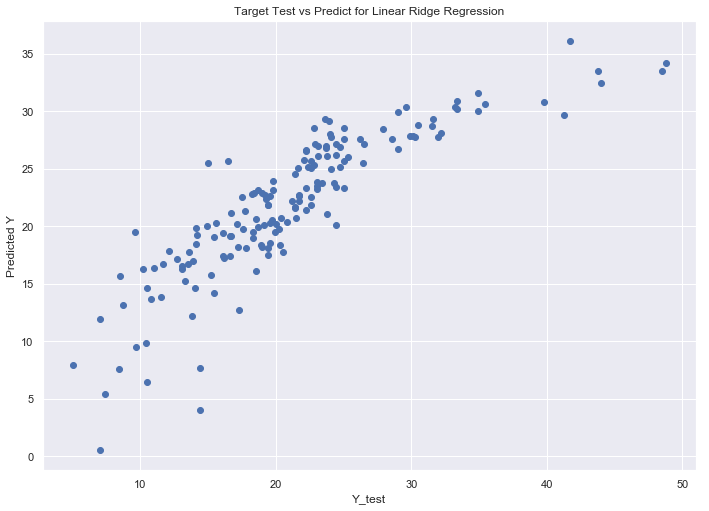

In [44]:
# plotting the y_test vs y_test_predict_lin for Linear Ridge Regression 
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_ridge)
plt.title("Target Test vs Predict for Linear Ridge Regression")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [45]:
# Define trianing and testing score accuracy
train_score = l_ridge.score(X_train, Y_train)
test_score = l_ridge.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.62
Test Accuracy: 0.73


# **Decision Tree**

In [46]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
treemodel = DecisionTreeRegressor(max_depth = 5)

In [48]:
treemodel.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
y_test_predict_tree = treemodel.predict(X_test)

In [50]:
df4 = pd.DataFrame({'Predict':np.round(y_test_predict_tree,4), 'Actual':Y_test}).reset_index(drop=True)
df4.head(10)

,Predict,Actual
0,17.9447,18.5
1,23.2000,12.7
2,22.1421,21.4
3,26.1000,23.7
4,20.4723,20.8
5,22.1421,25.0
6,12.6308,9.7
7,15.1619,14.9
8,34.5261,34.9
9,34.5261,31.6


In [51]:
score = treemodel.score(X_train,Y_train)
print(score)

0.873946835234087


In [52]:
mse = sklearn.metrics.mean_squared_error(Y_test, y_test_predict_tree)
print(mse)

16.636313925584403


In [53]:
scores = cross_val_score(treemodel, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTree'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -19.43 (+/- 12.46)


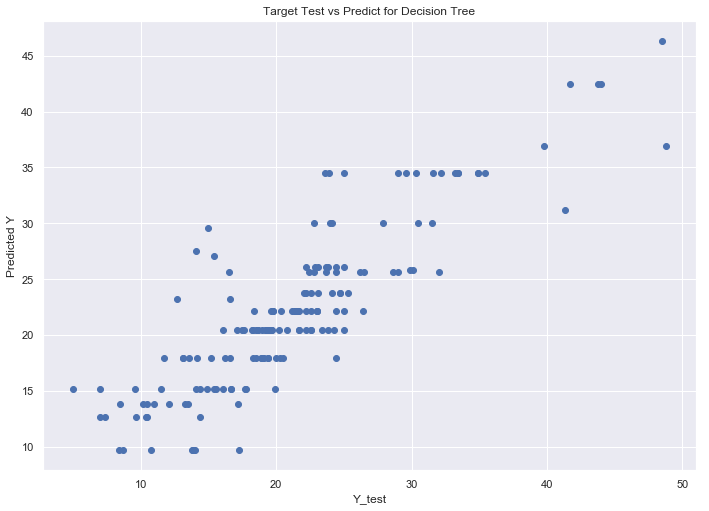

In [54]:
# plotting the y_test vs y_test_predict for Decision Tree
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_tree)
plt.title("Target Test vs Predict for Decision Tree")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [55]:
# Define trianing and testing score accuracy
train_score = treemodel.score(X_train, Y_train)
test_score = treemodel.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.87
Test Accuracy: 0.73


# **SVR**

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [57]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -18.08 (+/- 11.46)


In [58]:
scores_map['SVR'] = scores

In [59]:
svr_rbf.fit(X_train,Y_train)
y_test_predict_svr = svr_rbf.predict(X_test)

In [60]:
df7 = pd.DataFrame({'Predict':np.round(y_test_predict_svr,4), 'Actual':Y_test}).reset_index(drop=True)
df7.head(10)

,Predict,Actual
0,18.5004,18.5
1,16.7573,12.7
2,21.9435,21.4
3,25.6848,23.7
4,18.7076,20.8
5,23.2028,25.0
6,14.4067,9.7
7,14.4493,14.9
8,27.0039,34.9
9,30.9410,31.6


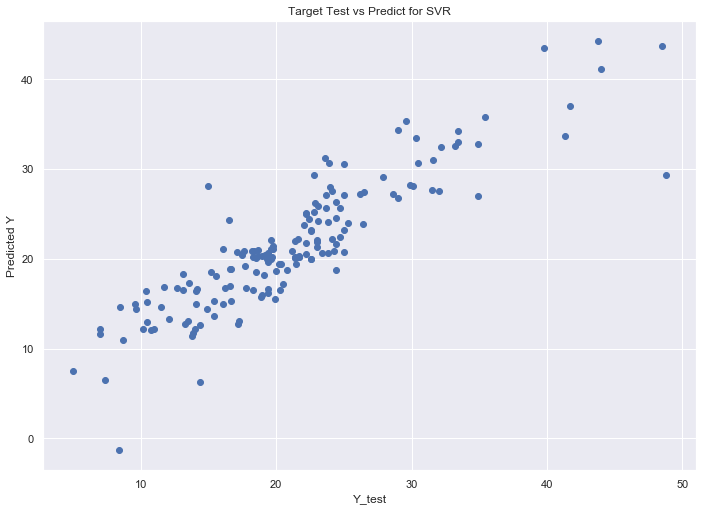

In [61]:
# plotting the y_test vs y_test_predict for SVR
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_svr)
plt.title("Target Test vs Predict for SVR")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [62]:
# Define trianing and testing score accuracy
train_score = svr_rbf.score(X_train, Y_train)
test_score = svr_rbf.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.83
Test Accuracy: 0.79


# **KNeighborsRegressor**

In [63]:
from sklearn.neighbors import KNeighborsRegressor

k: 1, Train/Test Score: 1.000/0.595
k: 3, Train/Test Score: 0.864/0.758
k: 5, Train/Test Score: 0.825/0.797
k: 7, Train/Test Score: 0.809/0.807
k: 9, Train/Test Score: 0.796/0.808
k: 11, Train/Test Score: 0.787/0.806
k: 13, Train/Test Score: 0.780/0.804
k: 15, Train/Test Score: 0.767/0.798
k: 17, Train/Test Score: 0.759/0.791
k: 19, Train/Test Score: 0.753/0.785


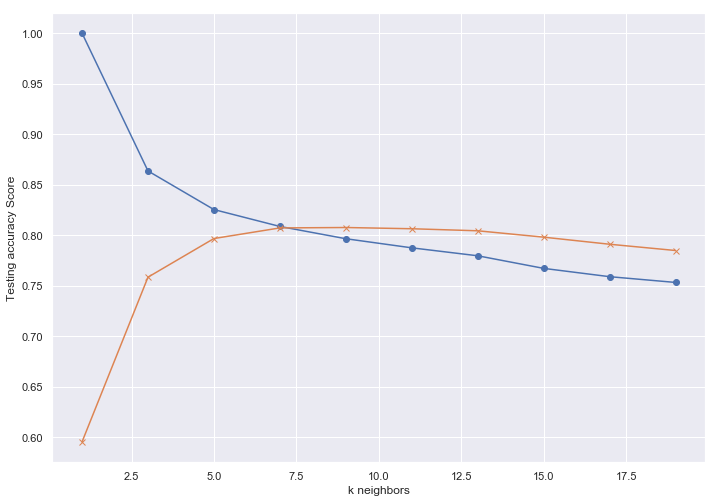

In [64]:
# Loop through different k values to see which has the highest accuracy
train_scores_knn = []
test_scores_knn = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_score = knn.score(X_train, Y_train)
    test_score = knn.score(X_test, Y_test)
    train_scores_knn.append(train_score)
    test_scores_knn.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores_knn, marker='o')
plt.plot(range(1, 20, 2), test_scores_knn, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [65]:
knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


KNN Accuracy: -15.64 (+/- 9.52)


In [66]:
knn.fit(X_train,Y_train)
y_test_predict_knn = knn.predict(X_test)

In [67]:
df8 = pd.DataFrame({'Predict':np.round(y_test_predict_knn,4), 'Actual':Y_test}).reset_index(drop=True)
df8.head(10)

,Predict,Actual
0,18.6000,18.5
1,18.2286,12.7
2,23.2571,21.4
3,25.4000,23.7
4,20.4857,20.8
5,23.0571,25.0
6,12.0571,9.7
7,17.1000,14.9
8,38.0429,34.9
9,29.0000,31.6


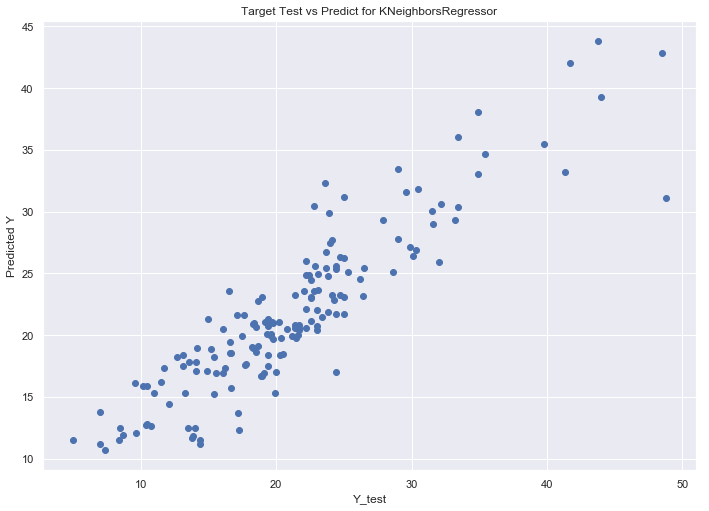

In [68]:
# plotting the y_test vs y_test_predict for KNeighborsRegressor
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_knn)
plt.title("Target Test vs Predict for KNeighborsRegressor")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [69]:
# Define trianing and testing score accuracy
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.81
Test Accuracy: 0.81


# **GradientBoostingRegressor**

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -15.73 (+/- 9.63)


In [71]:
gbr.fit(X_train,Y_train)
y_test_predict_gbr = gbr.predict(X_test)

In [72]:
df9 = pd.DataFrame({'Predict':np.round(y_test_predict_gbr,4), 'Actual':Y_test}).reset_index(drop=True)
df9.head(10)

,Predict,Actual
0,17.4128,18.5
1,17.3997,12.7
2,22.7639,21.4
3,23.8607,23.7
4,21.2316,20.8
5,22.7639,25.0
6,14.0155,9.7
7,14.8475,14.9
8,37.9680,34.9
9,33.4859,31.6


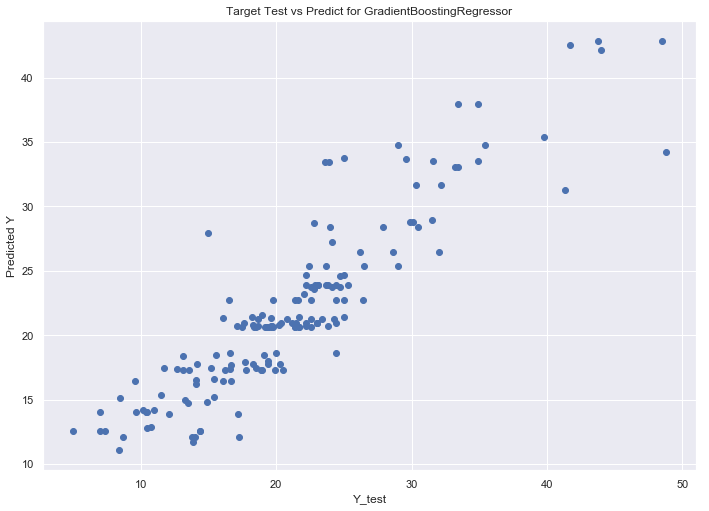

In [73]:
# plotting the y_test vs y_test_predict for GradientBoostingRegressor
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict_gbr)
plt.title("Target Test vs Predict for GradientBoostingRegressor")
plt.xlabel("Y_test")
plt.ylabel("Predicted Y")
plt.show()

In [74]:
# Define trianing and testing score accuracy
train_score = gbr.score(X_train, Y_train)
test_score = gbr.score(X_test, Y_test)
train_scores.append(train_score)
test_scores.append(test_score)

print("Train Accuracy: %0.2f" % (train_score))
print("Test Accuracy: %0.2f" % (test_score))

Train Accuracy: 0.84
Test Accuracy: 0.80


# **Comparing the different Models Predictions**

In [75]:
# compare the different Models Predictions
df1 = pd.DataFrame({'Predict Linear Regr':y_test_predict_lin, 
                    'Predict Linear Ridge':y_test_predict_ridge,
                    'Predict Polynomial Regr':y_test_predict_poly,
                    'Predict Polynomial Regr with L2':y_test_predict_L2,
                    'Predict Decision Tree':y_test_predict_tree,
                    'Predict SVR':y_test_predict_svr,
                    'Predict KNN':y_test_predict_knn,
                    'Predict GBR':y_test_predict_gbr,
                    'Actual':Y_test}).reset_index(drop=True)
df1.head(20)

,Predict Linear Regr,Predict Linear Ridge,Predict Polynomial Regr,Predict Polynomial Regr with L2,Predict Decision Tree,Predict SVR,Predict KNN,Predict GBR,Actual
0,16.076655,16.089231,16.144391,16.424111,17.944737,18.500408,18.600000,17.412798,18.5
1,17.111421,17.108477,16.186253,15.802749,23.200000,16.757303,18.228571,17.399662,12.7
2,24.507924,24.514621,23.645021,23.658947,22.142105,21.943500,23.257143,22.763949,21.4
3,26.831600,26.836300,26.402027,26.700298,26.100000,25.684826,25.400000,23.860741,23.7
4,20.305608,20.345332,17.257118,19.835981,20.472308,18.707641,20.485714,21.231610,20.8
5,25.636692,25.641530,25.070267,25.078241,22.142105,23.202823,23.057143,22.763949,25.0
6,9.487542,9.506605,13.104699,14.214829,12.630769,14.406709,12.057143,14.015542,9.7
7,20.086510,20.055147,15.217958,15.654807,15.161905,14.449275,17.100000,14.847486,14.9
8,31.562530,31.555650,35.235166,35.258099,34.526087,27.003852,38.042857,37.968039,34.9
9,29.360975,29.339318,32.949205,31.088515,34.526087,30.940964,29.000000,33.485937,31.6


In [76]:
# compare train and test scores of the different Models 
model_names = ["Linear Regr", "Poly Regr", "PolyL2 Regr", "Linear Ridge", 
               "Decision Tree", "SVR", "KNN", "GradientBoostingRegr"]
scores_df = pd.DataFrame(list(zip(model_names, train_scores, test_scores)), columns = ["Model Name", "Train score", "Test score"]).reset_index(drop=True)
scores_df

,Model Name,Train score,Test score
0,Linear Regr,0.616036,0.727584
1,Poly Regr,0.784257,0.815253
2,PolyL2 Regr,0.746907,0.830159
3,Linear Ridge,0.616029,0.727013
4,Decision Tree,0.873947,0.732687
5,SVR,0.831043,0.788594
6,KNN,0.808603,0.807147
7,GradientBoostingRegr,0.836214,0.803987


# **Choosing the best model** 

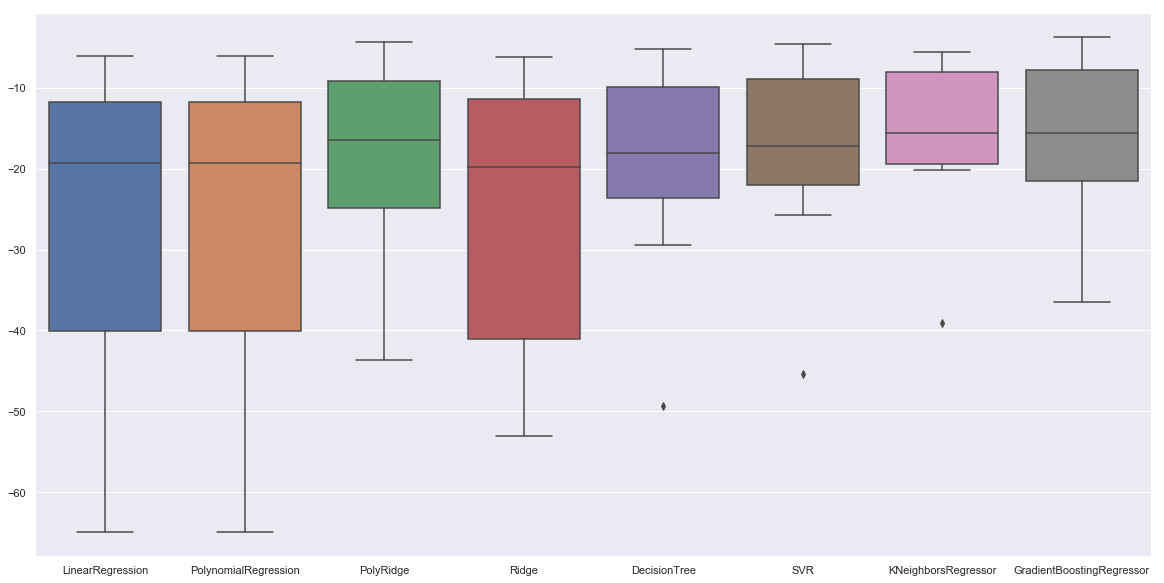

In [77]:
plt.figure(figsize=(20, 10))
scores_map_df = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map_df)

# **Conclusion**

# Our conclusion is SVR is the best model for this analysis.  The end.